In [1]:
import requests
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
price_url = 'https://terminal.bytetree.com/data/bitcoin/flows-price.json'
fund_flow_url = 'https://terminal.bytetree.com/data/bitcoin/fund-total.json'

In [3]:
price = requests.get(price_url).json()
fund_flow = requests.get(fund_flow_url).json()

In [4]:
price_df = pd.DataFrame(price)
price_df.index = pd.to_datetime(price_df['date'])

fund_flow_df = pd.DataFrame(fund_flow)
fund_flow_df.index = pd.to_datetime(fund_flow_df['date'])

In [5]:
merge_df = pd.merge(price_df.value, fund_flow_df.value, left_index=True, right_index=True, suffixes=('_price', '_fund_flow'))

In [6]:
merge_df.tail()

,value_price,value_fund_flow
date,,
2023-12-26,42517.32,889139
2023-12-27,43469.34,889858
2023-12-28,42588.94,890761
2023-12-29,42073.59,890938
2024-01-01,44197.61,892699


Text(0.5, 1.0, 'Bitcoin Price and Fund Flow (2022)')

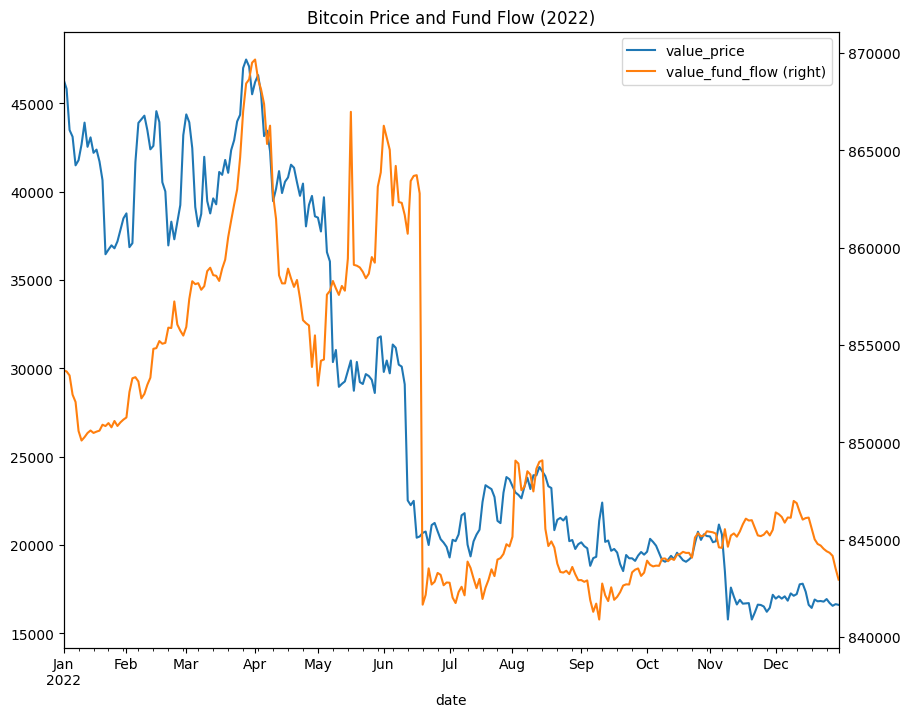

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
merge_df.loc['2022-01-01': '2023-01-01'].plot(y='value_price', ax=ax) 
merge_df.loc['2022-01-01': '2023-01-01'].plot(y='value_fund_flow', ax=ax, secondary_y=True) 
ax.set_title('Bitcoin Price and Fund Flow (2022)')


Text(0.5, 1.0, 'Bitcoin Price and Fund Flow (YTD)')

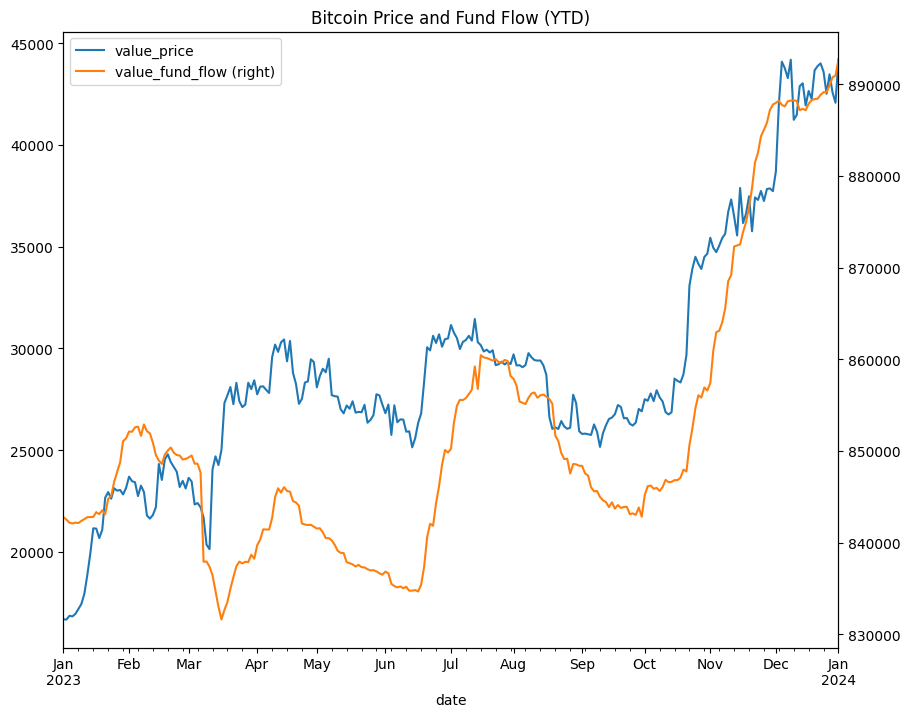

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
merge_df.loc['2023-01-01': ].plot(y='value_price', ax=ax) 
merge_df.loc['2023-01-01': ].plot(y='value_fund_flow', ax=ax, secondary_y=True) 
ax.set_title('Bitcoin Price and Fund Flow (YTD)')


In [9]:
import pandas as pd
from numpy.lib.stride_tricks import as_strided
from numpy.lib import pad
import numpy as np

def rolling_spearman(seqa, seqb, window):
    stridea = seqa.strides[0]
    ssa = as_strided(seqa, shape=[len(seqa) - window + 1, window], strides=[stridea, stridea])

    strideb = seqb.strides[0]
    ssb = as_strided(seqb, shape=[len(seqb) - window + 1, window], strides =[strideb, strideb])
    
    ar = pd.DataFrame(ssa)
    br = pd.DataFrame(ssb)
    ar = ar.rank(1)
    br = br.rank(1)
    corrs = ar.corrwith(br, 1)
    return pad(corrs, (window - 1, 0), 'constant', constant_values=np.nan)


In [10]:
merge_df['corr'] = rolling_spearman(np.array(merge_df.value_price), np.array(merge_df.value_fund_flow), 30)

Text(0.5, 1.0, 'Bitcoin Price and 30d rolling correlation with Fund Flow')

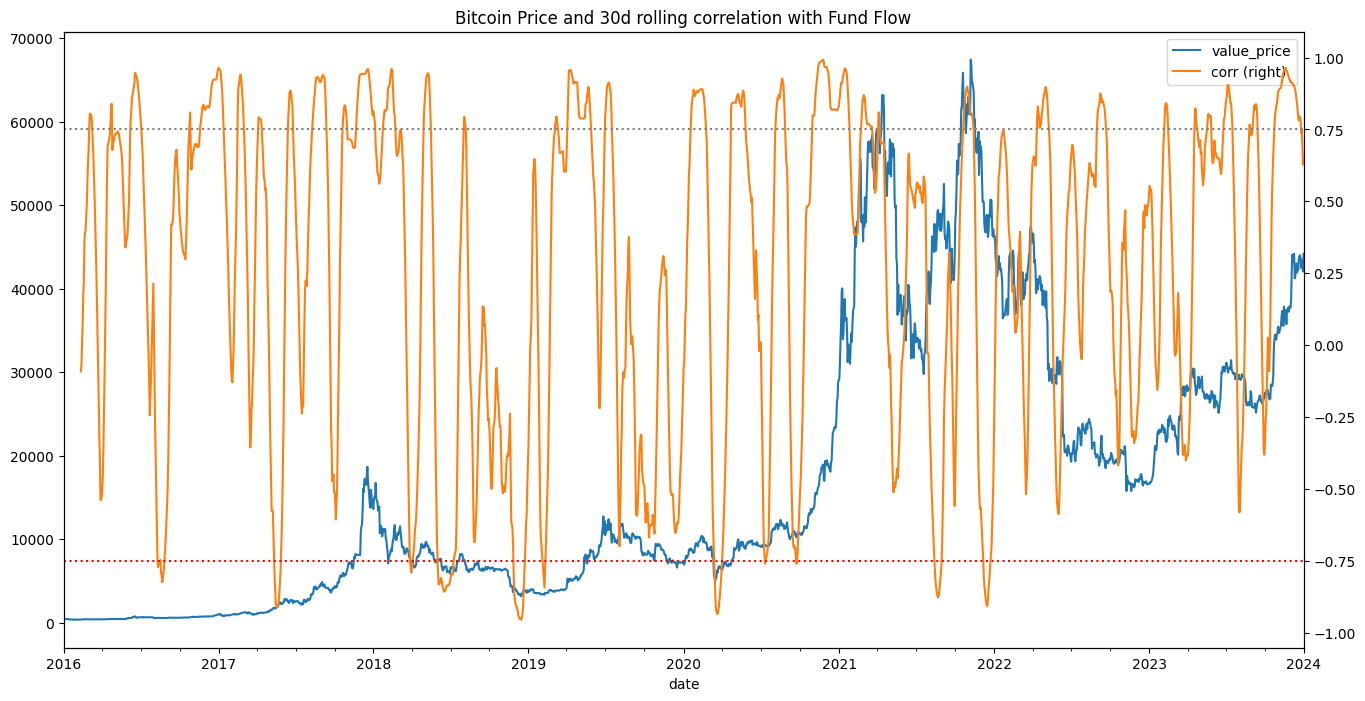

In [11]:
fig, ax = plt.subplots(figsize=(16, 8))
merge_df.plot(y='value_price', ax=ax) 
merge_df.plot(y='corr', ax=ax, secondary_y=True)
ax.right_ax.axhline(y=0.75, color='grey', linestyle='dotted')
ax.right_ax.axhline(y=-0.75, color='red', linestyle='dotted')
ax.set_title('Bitcoin Price and 30d rolling correlation with Fund Flow')
